In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import plotly.graph_objects as go
import json
import requests
import datetime
import iso8601

from datetime import datetime
from tqdm import tqdm

sns.set()
plt.rcParams["figure.figsize"] = (18,10)


In [2]:
def ohlc_plot(df,start = '2018',end = '2021',Log = False):
    if Log:
        fig = go.Figure(data=[go.Candlestick(x=df.loc[start:end].index,
                        open=np.log(df.Open.loc[start:end]),
                        high=np.log(df.High.loc[start:end]),
                        low=np.log(df.Low.loc[start:end]),
                        close=np.log(df.Close.loc[start:end]))])
    else:
        fig = go.Figure(data=[go.Candlestick(x=df.loc[start:end].index,
                        open=(df.Open.loc[start:end]),
                        high=(df.High.loc[start:end]),
                        low=(df.Low.loc[start:end]),
                        close=(df.Close.loc[start:end]))])


    fig.update_layout(xaxis_rangeslider_visible=False)
    fig.show()
    return
    

In [3]:
eth = yf.Ticker("ETH-USD")
data = eth.history(period="max")[['Open','High','Low','Close','Volume']]
data = data.reset_index()

In [6]:
from fbprophet import Prophet

df = pd.concat([data['Date'],np.log(data['Close'])],axis = 1)
df = df.rename(columns = {"Date":"ds","Close":"y"}) 
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(df.loc[:'2015']) # fit the model using all data


Initial log joint probability = -33.2978
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4787.06     0.0908757       1950.42           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4992.46     0.0194847       730.919           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5071.8     0.0355218       1186.96      0.6155      0.6155      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5104.92    0.00578269       1317.71      0.2473           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5129.69     0.0230273       922.296     0.04349           1      575   
    Iter      log prob        ||dx||      ||grad||       alpha  

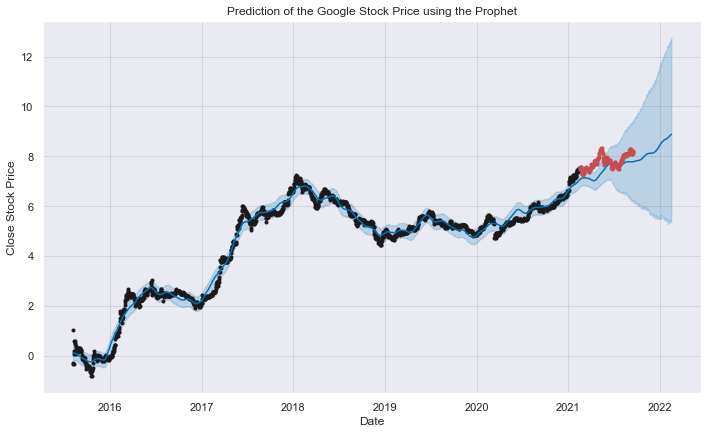

In [7]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.plot(df.loc['2015':,'ds'],df.loc['2015':,'y'],'r.')
plt.title("Prediction of the Google Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()